In [5]:
# 1. Drop unneeded columns in frames data

# header computed on one frame row (skipping rows 2-6) with following replace regex
# ([A-z]+)\s*\w+\s+[\-0-9\.]+\s+[\-0-9\.]+\s+[\-0-9\.]+\s+[\-0-9\.]+\s+[\-0-9\.]+\s+[\-0-9\.]+\s+[\-0-9\.]+\s+
# $1\t$1Status\t$1LocX\t$1LocY\t$1LocZ\t$1OrW\t$1OrX\t$1OrY\t$1OrZ\t
header = ["Index","Time","SkeletonId","HandLeftConfidence","HandLeftState","HandRightConfidence","HandRightState","SpineBase","SpineBaseStatus","SpineBaseLocX","SpineBaseLocY","SpineBaseLocZ","SpineBaseOrW","SpineBaseOrX","SpineBaseOrY","SpineBaseOrZ","SpineMid","SpineMidStatus","SpineMidLocX","SpineMidLocY","SpineMidLocZ","SpineMidOrW","SpineMidOrX","SpineMidOrY","SpineMidOrZ","Neck","NeckStatus","NeckLocX","NeckLocY","NeckLocZ","NeckOrW","NeckOrX","NeckOrY","NeckOrZ","Head","HeadStatus","HeadLocX","HeadLocY","HeadLocZ","HeadOrW","HeadOrX","HeadOrY","HeadOrZ","ShoulderLeft","ShoulderLeftStatus","ShoulderLeftLocX","ShoulderLeftLocY","ShoulderLeftLocZ","ShoulderLeftOrW","ShoulderLeftOrX","ShoulderLeftOrY","ShoulderLeftOrZ","ElbowLeft","ElbowLeftStatus","ElbowLeftLocX","ElbowLeftLocY","ElbowLeftLocZ","ElbowLeftOrW","ElbowLeftOrX","ElbowLeftOrY","ElbowLeftOrZ","WristLeft","WristLeftStatus","WristLeftLocX","WristLeftLocY","WristLeftLocZ","WristLeftOrW","WristLeftOrX","WristLeftOrY","WristLeftOrZ","HandLeft","HandLeftStatus","HandLeftLocX","HandLeftLocY","HandLeftLocZ","HandLeftOrW","HandLeftOrX","HandLeftOrY","HandLeftOrZ","ShoulderRight","ShoulderRightStatus","ShoulderRightLocX","ShoulderRightLocY","ShoulderRightLocZ","ShoulderRightOrW","ShoulderRightOrX","ShoulderRightOrY","ShoulderRightOrZ","ElbowRight","ElbowRightStatus","ElbowRightLocX","ElbowRightLocY","ElbowRightLocZ","ElbowRightOrW","ElbowRightOrX","ElbowRightOrY","ElbowRightOrZ","WristRight","WristRightStatus","WristRightLocX","WristRightLocY","WristRightLocZ","WristRightOrW","WristRightOrX","WristRightOrY","WristRightOrZ","HandRight","HandRightStatus","HandRightLocX","HandRightLocY","HandRightLocZ","HandRightOrW","HandRightOrX","HandRightOrY","HandRightOrZ","HipLeft","HipLeftStatus","HipLeftLocX","HipLeftLocY","HipLeftLocZ","HipLeftOrW","HipLeftOrX","HipLeftOrY","HipLeftOrZ","KneeLeft","KneeLeftStatus","KneeLeftLocX","KneeLeftLocY","KneeLeftLocZ","KneeLeftOrW","KneeLeftOrX","KneeLeftOrY","KneeLeftOrZ","AnkleLeft","AnkleLeftStatus","AnkleLeftLocX","AnkleLeftLocY","AnkleLeftLocZ","AnkleLeftOrW","AnkleLeftOrX","AnkleLeftOrY","AnkleLeftOrZ","FootLeft","FootLeftStatus","FootLeftLocX","FootLeftLocY","FootLeftLocZ","FootLeftOrW","FootLeftOrX","FootLeftOrY","FootLeftOrZ","HipRight","HipRightStatus","HipRightLocX","HipRightLocY","HipRightLocZ","HipRightOrW","HipRightOrX","HipRightOrY","HipRightOrZ","KneeRight","KneeRightStatus","KneeRightLocX","KneeRightLocY","KneeRightLocZ","KneeRightOrW","KneeRightOrX","KneeRightOrY","KneeRightOrZ","AnkleRight","AnkleRightStatus","AnkleRightLocX","AnkleRightLocY","AnkleRightLocZ","AnkleRightOrW","AnkleRightOrX","AnkleRightOrY","AnkleRightOrZ","FootRight","FootRightStatus","FootRightLocX","FootRightLocY","FootRightLocZ","FootRightOrW","FootRightOrX","FootRightOrY","FootRightOrZ","SpineShoulder","SpineShoulderStatus","SpineShoulderLocX","SpineShoulderLocY","SpineShoulderLocZ","SpineShoulderOrW","SpineShoulderOrX","SpineShoulderOrY","SpineShoulderOrZ","HandTipLeft","HandTipLeftStatus","HandTipLeftLocX","HandTipLeftLocY","HandTipLeftLocZ","HandTipLeftOrW","HandTipLeftOrX","HandTipLeftOrY","HandTipLeftOrZ","ThumbLeft","ThumbLeftStatus","ThumbLeftLocX","ThumbLeftLocY","ThumbLeftLocZ","ThumbLeftOrW","ThumbLeftOrX","ThumbLeftOrY","ThumbLeftOrZ","HandTipRight","HandTipRightStatus","HandTipRightLocX","HandTipRightLocY","HandTipRightLocZ","HandTipRightOrW","HandTipRightOrX","HandTipRightOrY","HandTipRightOrZ","ThumbRight","ThumbRightStatus","ThumbRightLocX","ThumbRightLocY","ThumbRightLocZ","ThumbRightOrW","ThumbRightOrX","ThumbRightOrY","ThumbRightOrZ"]
cols = dict()
for i in range(len(header)) :
    cols[i] = header[i]
    
# confidence
for i in range(2,7) :
    del cols[i]
    
# joint name
for i in range(7,224,9) :
    del cols[i]
    
# 8 lower joints
for i in [116, 125, 134, 143, 152, 161, 170, 179] :
    for j in range(8) :
        del cols[i+j]
        
# always null orientations
for i in [39, 201, 210, 219, 228] :
    for j in range(4) :
        del cols[i+j]

# remove tracking status features
for i in [8, 17, 26, 35, 44, 53, 62, 71, 80, 89, 98, 107, 188, 197, 206, 215, 224] :
    del cols[i]
    
        
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_eggnog_skeleton(filepath):
    filepath = "datasets/eggnog.original/" + filepath
    dataframe = pd.read_csv(filepath, header=None, skiprows=[0], usecols=list(cols.keys()), names=list(cols.values()))
    return dataframe

In [6]:
# 2. Train & test set construction

# hyperparameters
# moveDetectionDuraction (ns) : window of time around which the frames are considered as a start/end frame [-moveDetectionDuration,moveDetectionDuration]
moveDetectionDuration = 100000 # 20 ms


def load_timestamps(filepath):
    filepath = "datasets/eggnog.original/" + filepath
    # print(filepath)
    dataframe = pd.read_csv(filepath)
    return dataframe

def createFrameTest(sFrames, eFrames, timestamps) :
    def getFrameLabels(frame) :
        isSF, isEF = False, False
        for f in sFrames :
            if abs(frame[1] - timestamps[f][1]) < moveDetectionDuration :
                isSF = True
                #print(timestamps[f][1] - moveDetectionDuration, "<", frame[1], "<", timestamps[f][1] + moveDetectionDuration, "for frame",f)
                break
#        for f in eFrames :
#            if abs(frame[1] - f*1000000000/30) < moveDetectionDuration :
#                isEF = True
#                print(frame[1], "ef frame", f)
#                break
        return isSF
    return getFrameLabels
    


s01/part1_layout_p02/20151105_191251_00
s01/part1_layout_p02/20151105_192144_00
s01/part1_layout_p02/20151105_192312_00
s01/part1_layout_p02/20151105_192407_00
s01/part1_layout_p02/20151105_192610_00
s01/part1_layout_p02/20151105_192717_00
s01/part1_layout_p02/20151105_193157_00
s01/part2_layout_p01/20151105_194301_00
s01/part2_layout_p01/20151105_194456_00
s01/part2_layout_p01/20151105_194650_00
s01/part2_layout_p01/20151105_194955_00
s01/part2_layout_p01/20151105_195111_00
s01/part2_layout_p01/20151105_195450_00
s02/part1_layout_p04/20151106_214357_00
s02/part1_layout_p04/20151106_214521_00
s02/part1_layout_p04/20151106_214647_00
s02/part1_layout_p04/20151106_215028_00
s02/part1_layout_p04/20151106_215120_00
s02/part1_layout_p04/20151106_215320_00
s02/part1_layout_p04/20151106_215547_00
s02/part1_layout_p04/20151106_215829_00
s02/part2_layout_p03/20151106_220752_00
s02/part2_layout_p03/20151106_220857_00
s02/part2_layout_p03/20151106_221002_00
s02/part2_layout_p03/20151106_221038_00


s18/part2_layouts_p35/20160129_193148_00 ignored, no frame file found
s18/part2_layouts_p35/20160129_193341_00 ignored, no frame file found
s18/part2_layouts_p35/20160129_193701_00 ignored, no frame file found
s18/part2_layouts_p35/20160129_193930_00 ignored, no frame file found
s18/part2_layouts_p35/20160129_194239_00 ignored, no frame file found
s18/part2_layouts_p35/20160129_194342_00 ignored, no frame file found
s18/part2_layouts_p35/20160129_194443_00 ignored, no frame file found
s18/part2_layouts_p35/20160129_195318_00 ignored, no frame file found
s18/part2_layouts_p35/20160129_195344_00 ignored, no frame file found
s20/part1_layout_p40/20160205_000924_00 ignored, no frame file found
s20/part1_layout_p40/20160205_001549_00 ignored, no frame file found
s20/part1_layout_p40/20160205_003045_00 ignored, no frame file found
s20/part1_layout_p40/20160205_003502_00 ignored, no frame file found
s20/part1_layout_p40/20160205_003723_00 ignored, no frame file found
s20/part2_layout_p39/2016

s17/part1_layouts_p34/20160128_194122_00 ignored, no frame file found
s17/part1_layouts_p34/20160128_194217_00 ignored, no frame file found
s17/part1_layouts_p34/20160128_194244_00 ignored, no frame file found
s17/part1_layouts_p34/20160128_194307_00 ignored, no frame file found
s17/part1_layouts_p34/20160128_194339_00 ignored, no frame file found
s17/part1_layouts_p34/20160128_194418_00 ignored, no frame file found
s17/part1_layouts_p34/20160128_194532_00 ignored, no frame file found
s17/part1_layouts_p34/20160128_194612_00 ignored, no frame file found
s17/part1_layouts_p34/20160128_194658_00 ignored, no frame file found
s17/part2_layouts_p33/20160128_195152_00 ignored, no frame file found
s17/part2_layouts_p33/20160128_195214_00 ignored, no frame file found
s17/part2_layouts_p33/20160128_195353_00 ignored, no frame file found
s17/part2_layouts_p33/20160128_195448_00 ignored, no frame file found
s17/part2_layouts_p33/20160128_195614_00 ignored, no frame file found
s17/part2_layouts_p3

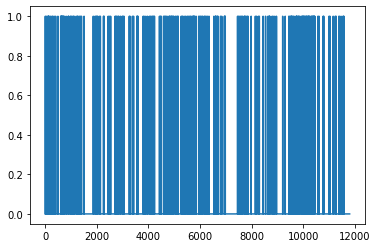

In [7]:
# 3. Dataset labels parsing

labels = pd.read_csv("datasets/eggnog/Labels.tsv", sep='\t')
sFrames, eFrames = list(), list()
data = dict()
lastFile = ""
n=0
ns, nf = 0, 0
for i in range(len(labels)) :
    l = labels.loc[i]
    n+=1
    #if n > 10000 : break
    # else : print(str(n)+"/400")
    if lastFile != "" and lastFile != l["File Name"] :
        lastFile = lastFile.replace("\\", "/")
        eggSkel = load_eggnog_skeleton(lastFile+"_Skeleton.txt")
        timestampsOk = False
        try:
            timestamps = load_timestamps(lastFile+"_RGB.frames")
            timestampsOk = True
        except FileNotFoundError:
            try:
                timestamps = load_timestamps(lastFile+"_Video.frames")
                timestampsOk = True
            except FileNotFoundError:
                print(lastFile+ " ignored, no frame file found")
                nf +=1
        if(timestampsOk) :
            frames = eggSkel.drop(["Index", "Time"], 1).values
            print(lastFile)
            labs = list(map(createFrameTest(sFrames, eFrames, timestamps.values), eggSkel.values))
            data[lastFile] = [frames, labs]
            #print(lastFile+ " ignored, no frame file found")
            ns += 1
        sFrames, eFrames = list(), list()
    lastFile = l["File Name"]
    sFrames.append(l["Start Frame"])
    eFrames.append(l["End Frame"])
    
print(str(ns) +" files loaded for "+str(nf)+" fails (frames file not found), itered on "+str(n)+" total labels")
plt.plot(data['s01/part1_layout_p02/20151105_191251_00'][1])

In [4]:
# 4. Dataset tf inputable preparation 

def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

past_history = 15
future_target = 0
STEP = 1
TRAIN_SPLIT = None
BUFFER_SIZE = 10000
BATCH_SIZE = 256

x_train_single, y_train_single = [[[]]], [[[]]]


i = 0

for file in data :
    i += 1
    if i > 30 : break # reducing dataset size for first tries
    print(str(i) + ". Processing "+file+"..")
    X = data[file][0]
    Y = data[file][1]
    x_train_step, y_train_step = multivariate_data(X, Y, 0,
                                                       TRAIN_SPLIT, past_history,
                                                       future_target, STEP,
                                                       single_step=True)
    

    
    x_train_single += x_train_step.tolist()
    y_train_single += y_train_step.tolist()
    
x_train_single, y_train_single = x_train_single[1:], y_train_single[1:]
    
        
x_val_single, y_val_single = [[[]]], [[[]]]    

i=30
for file in data :
    i += 1
    if i > 50 : break # reducing dataset size for first tries
    print(str(i) + ". Processing "+file+"..")
    X = data[file][0]
    Y = data[file][1]
    x_val_step, y_val_step = multivariate_data(X, Y,
                                               0, TRAIN_SPLIT, past_history,
                                               future_target, STEP,
                                               single_step=True)    

    x_val_single += x_val_step.tolist()
    y_val_single += y_val_step.tolist()


x_val_single, y_val_single = x_val_single[1:], y_val_single[1:]


# x_val_single, y_val_single = multivariate_data(X, Y,
#                                               TRAIN_SPLIT, None, past_history,
#                                               future_target, STEP,
#                                               single_step=True)

# train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
# train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

# val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
# val_data_single = val_data_single.batch(BATCH_SIZE).repeat()
print("done!")

1. Processing s01/part1_layout_p02/20151105_191251_00..
2. Processing s01/part1_layout_p02/20151105_192144_00..
3. Processing s01/part1_layout_p02/20151105_192312_00..
4. Processing s01/part1_layout_p02/20151105_192407_00..
5. Processing s01/part1_layout_p02/20151105_192610_00..
6. Processing s01/part1_layout_p02/20151105_192717_00..
7. Processing s01/part1_layout_p02/20151105_193157_00..
8. Processing s01/part2_layout_p01/20151105_194301_00..
9. Processing s01/part2_layout_p01/20151105_194456_00..
10. Processing s01/part2_layout_p01/20151105_194650_00..
11. Processing s01/part2_layout_p01/20151105_194955_00..
12. Processing s01/part2_layout_p01/20151105_195111_00..
13. Processing s01/part2_layout_p01/20151105_195450_00..
14. Processing s02/part1_layout_p04/20151106_214357_00..
15. Processing s02/part1_layout_p04/20151106_214521_00..
16. Processing s02/part1_layout_p04/20151106_214647_00..
17. Processing s02/part1_layout_p04/20151106_215028_00..
18. Processing s02/part1_layout_p04/2015

KeyboardInterrupt: 

In [8]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

In [9]:
def createDataSet(data, ratio):
    #Parameters
    past_history = 15
    future_target = 0
    STEP = 1
    TRAIN_SPLIT = None
    BUFFER_SIZE = 10000
    BATCH_SIZE = 256
    
    maxIndexFile=50
    #maxIndexFile=len(data)
    valStart=int(ratio*maxIndexFile)
    
    
    #Training set
    print("Creating training set with "+str(valStart)+" files")
    x_train_single, y_train_single = [[[]]], [[[]]]
    i = 0
    for file in data :
        i += 1
        if i > valStart : break # reducing dataset size for first tries
        print(str(i) + ". Processing "+file+"..")
        X = data[file][0]
        Y = data[file][1]
        x_train_step, y_train_step = multivariate_data(X, Y, 0,
                                                           TRAIN_SPLIT, past_history,
                                                           future_target, STEP,
                                                           single_step=True)    
        x_train_single += x_train_step.tolist()
        y_train_single += y_train_step.tolist()
    
    x_train_single, y_train_single = x_train_single[1:], y_train_single[1:]
    
    #Validation set
    print("Creating validation set with "+str(maxIndexFile-valStart)+" files")
    x_val_single, y_val_single = [[[]]], [[[]]] 
    i=valStart
    for file in data :
        i += 1
        if i > maxIndexFile : break # reducing dataset size for first tries
        print(str(i) + ". Processing "+file+"..")
        X = data[file][0]
        Y = data[file][1]
        x_val_step, y_val_step = multivariate_data(X, Y,
                                                   0, TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)    

        x_val_single += x_val_step.tolist()
        y_val_single += y_val_step.tolist()


    x_val_single, y_val_single = x_val_single[1:], y_val_single[1:]
    
    print("done!")
    
    #return traing and validation sets
    return x_train_single, y_train_single, x_val_single, y_val_single
    
    
    

In [10]:
xTrain, yTrain, xVal, yVal=createDataSet(data, 0.8)

Creating training set with 40 files
1. Processing s01/part1_layout_p02/20151105_191251_00..
2. Processing s01/part1_layout_p02/20151105_192144_00..
3. Processing s01/part1_layout_p02/20151105_192312_00..
4. Processing s01/part1_layout_p02/20151105_192407_00..
5. Processing s01/part1_layout_p02/20151105_192610_00..
6. Processing s01/part1_layout_p02/20151105_192717_00..
7. Processing s01/part1_layout_p02/20151105_193157_00..
8. Processing s01/part2_layout_p01/20151105_194301_00..
9. Processing s01/part2_layout_p01/20151105_194456_00..
10. Processing s01/part2_layout_p01/20151105_194650_00..
11. Processing s01/part2_layout_p01/20151105_194955_00..
12. Processing s01/part2_layout_p01/20151105_195111_00..
13. Processing s01/part2_layout_p01/20151105_195450_00..
14. Processing s02/part1_layout_p04/20151106_214357_00..
15. Processing s02/part1_layout_p04/20151106_214521_00..
16. Processing s02/part1_layout_p04/20151106_214647_00..
17. Processing s02/part1_layout_p04/20151106_215028_00..
18. 

In [11]:
def equalizeSamples(X, Y, targetRatio):
    
    print("counting true labels")
    #count true labels
    count=0
    
    lenX=len(X)
    for i in range (lenX):
        if(Y[i]==1):
            count+=1
            
    print("Found " + str(count) + " TRUE samples out of " + str(lenX) + " total samples")
    
    print("Equalizing samples")
            
    #equalize samples
    ratio=count/len(X)
    while (ratio<targetRatio):
        randTrainIndex=random.randrange(0, len(X))
        
        #find random True Sample
        while True:
            randTrueSampleIndex=random.randrange(0, len(X))
            if Y[randTrueSampleIndex]==1:
                break
        
        randomXTrueSample=X[randTrueSampleIndex]
        randomYTrueSample=Y[randTrueSampleIndex]
        
        X.insert(randTrainIndex, randomXTrueSample)
        Y.insert(randTrainIndex, randomYTrueSample)
        
        count +=1
        ratio=count/len(X)
        
    print("Samples equalized with " +str(ratio)+ " ratio")
    
    return X, Y
            

In [15]:
import random
len(xVal)

30744

In [19]:
xTrain, yTrain=equalizeSamples(xTrain, yTrain, 0.5)
xVal, yVal=equalizeSamples(xVal, yVal, 0.5)

counting true labels
Found 1518 TRUE samples out of 83618 total samples
Equalizing samples
Samples equalized with 0.5 ratio
counting true labels
Found 536 TRUE samples out of 30744 total samples
Equalizing samples
Samples equalized with 0.5 ratio


In [36]:
lenX=len(x_train_single)
count=0
for i in range(lenX):
    if (y_train_single[i]==1):
        count+=1

In [22]:
import random
for i in range(40000):
    rand1=random.randrange(0, len(x_train_single))
    rand2=random.randrange(0, len(trueListX))
    x_train_single.insert(rand1, trueListX[rand2])
    y_train_single.insert(rand1, trueListY[rand2])

In [1]:
plotRatio(xTrain, yTrain)
plotRatio(xVal, yVal)

NameError: name 'plotRatio' is not defined

In [16]:
def plotRatio(X, Y):
    count=0
    lenX=len(X)
    for i in range(lenX):
        if (Y[i]==1):
            count+=1
            
    labels = 'continuous', 'gesture'
    sizes = [len(Y)-count, count]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')

    plt.show()

In [23]:
len(x_train_single)

162636

In [22]:
xNP.shape

(102636, 15, 99)

In [23]:
yNP.shape

(102636,)

In [21]:
import tensorflow as tf

In [22]:
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(100))
single_step_model.add(tf.keras.layers.Dense(1))
single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

In [23]:
epochs = 5
batch_size = 64

x_train_single = np.array(xTrain)
y_train_single = np.array(yTrain)

history = single_step_model.fit(x_train_single, y_train_single, epochs=epochs, batch_size=batch_size,validation_split=0.1)

Train on 147780 samples, validate on 16420 samples
Epoch 1/5
147780/147780 [==============================] - 33s 225us/sample - loss: 0.4071 - val_loss: 0.5255
Epoch 2/5
147780/147780 [==============================] - 31s 208us/sample - loss: 0.3062 - val_loss: 0.4687
Epoch 3/5
147780/147780 [==============================] - 31s 208us/sample - loss: 0.2436 - val_loss: 0.3674
Epoch 4/5
147780/147780 [==============================] - 33s 223us/sample - loss: 0.2050 - val_loss: 0.3674
Epoch 5/5
147780/147780 [==============================] - 33s 225us/sample - loss: 0.1763 - val_loss: 0.3371


In [24]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()



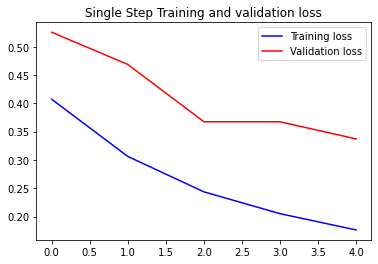

In [25]:
plot_train_history(history, 'Single Step Training and validation loss')

In [33]:
predicted=[]
length=len(x_train_single)
for i in range (length-10):
    if i%100==0:
        print(i)
    predicted.append(single_step_model.predict(x_train_single[i:i+10])[9][0])

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600


KeyboardInterrupt: 

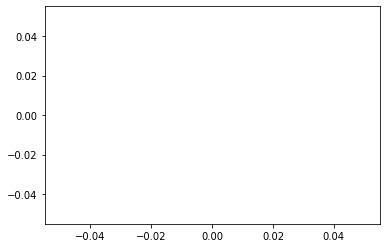

In [36]:
# 04/24 first 

plt.plot(predicted[100000:])

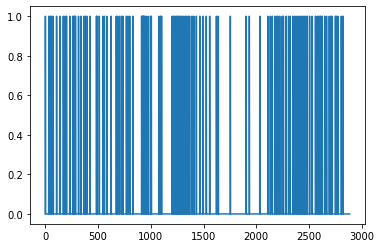

In [43]:
plt.plot(y_train_single[100000:])

In [ ]:
y_pred=single_step_model.predict_classes(x_train_single)
con_mat = tf.math.confusion_matrix(labels=y_train_single, predictions=y_pred).numpy()

In [27]:
con_mat

array([[100651,      0],
       [  1985,      0]], dtype=int32)

In [2]:
con_mat

NameError: name 'con_mat' is not defined

In [34]:
acc=(86111+20573)/len(x_train_single)

In [3]:
acc

NameError: name 'acc' is not defined

In [26]:
def confusionMatrix(model, X, Y):
    y_pred=model.predict_classes(X)
    con_mat=tf.math.confusion_matrix(labels=Y, predictions=y_pred).numpy()
    return con_mat

In [ ]:
print(confusionMatrix(single_step_model, xVal, yVal))